In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
sb.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [2]:
def get_data(data_set):
    url = "https://storage.googleapis.com/qwasar-public/track-ds/Visa_For_Lisa_Loan_Modelling.csv"
    data = pd.read_csv(url)
    return data
dataset = get_data('data')
dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
def print_summarize_dataset(data_set):
    """This function prints out the dimension, first 10 rows, and the statistical summary of the boston housing prices data"""
    
    # print the data dimension
    print("Dataset dimension:")
    print(dataset.shape)
    print()
   
    # print the first 10 rows
    print("First 10 rows of dataset:")
    print(dataset.head(10))
    print()

    # print the summary statistics
    print("Statistical summary:")
    print(dataset.describe())

# Assuming you have a dataset named 'dataset' containing the boston housing prices data
print_summarize_dataset(dataset)


Dataset dimension:
(5000, 14)

First 10 rows of dataset:
   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   
5   6   37          13      29     92121       4    0.4          2       155   
6   7   53          27      72     91711       2    1.5          2         0   
7   8   50          24      22     93943       1    0.3          3         0   
8   9   35          10      81     90089       3    0.6          2       104   
9  10   34           9     180     93023       1    8.9          3         0   

   Personal Loan  Securities Account  CD Account  Online  Cred

In [4]:
def data_info(dataset):
    """this function inspects the data set"""
    
    # checking for  number of duplicates in the dataset
    print("Total number of duplicates found:")
    print(dataset.duplicated().sum())
    print()
    
    # checking the data type and null values 
    print("Dataset information:")
    dataset.info()
data_info(dataset)

Total number of duplicates found:
0

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 K

In [5]:
# check for unique values in the categorical data
columns_to_check = ['Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Family']

for column in columns_to_check:
    unique_values = dataset[column].unique()
    print(f"{column}: {unique_values}")

Education: [1 2 3]
Securities Account: [1 0]
CD Account: [0 1]
Online: [0 1]
CreditCard: [0 1]
Family: [4 3 1 2]


In [6]:
# Convert the integer columns to categorical data type
categorical_columns = ['Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Family']

for column in categorical_columns:
    dataset[column] = dataset[column].astype('category')

# Verify data types
print(dataset.dtypes)

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan            int64
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object


In [7]:
# Drop irrelevant columns
dataset.drop(columns = ['ZIP Code', 'ID'], axis = 1, inplace = True)

## Exploratory Data Analysis

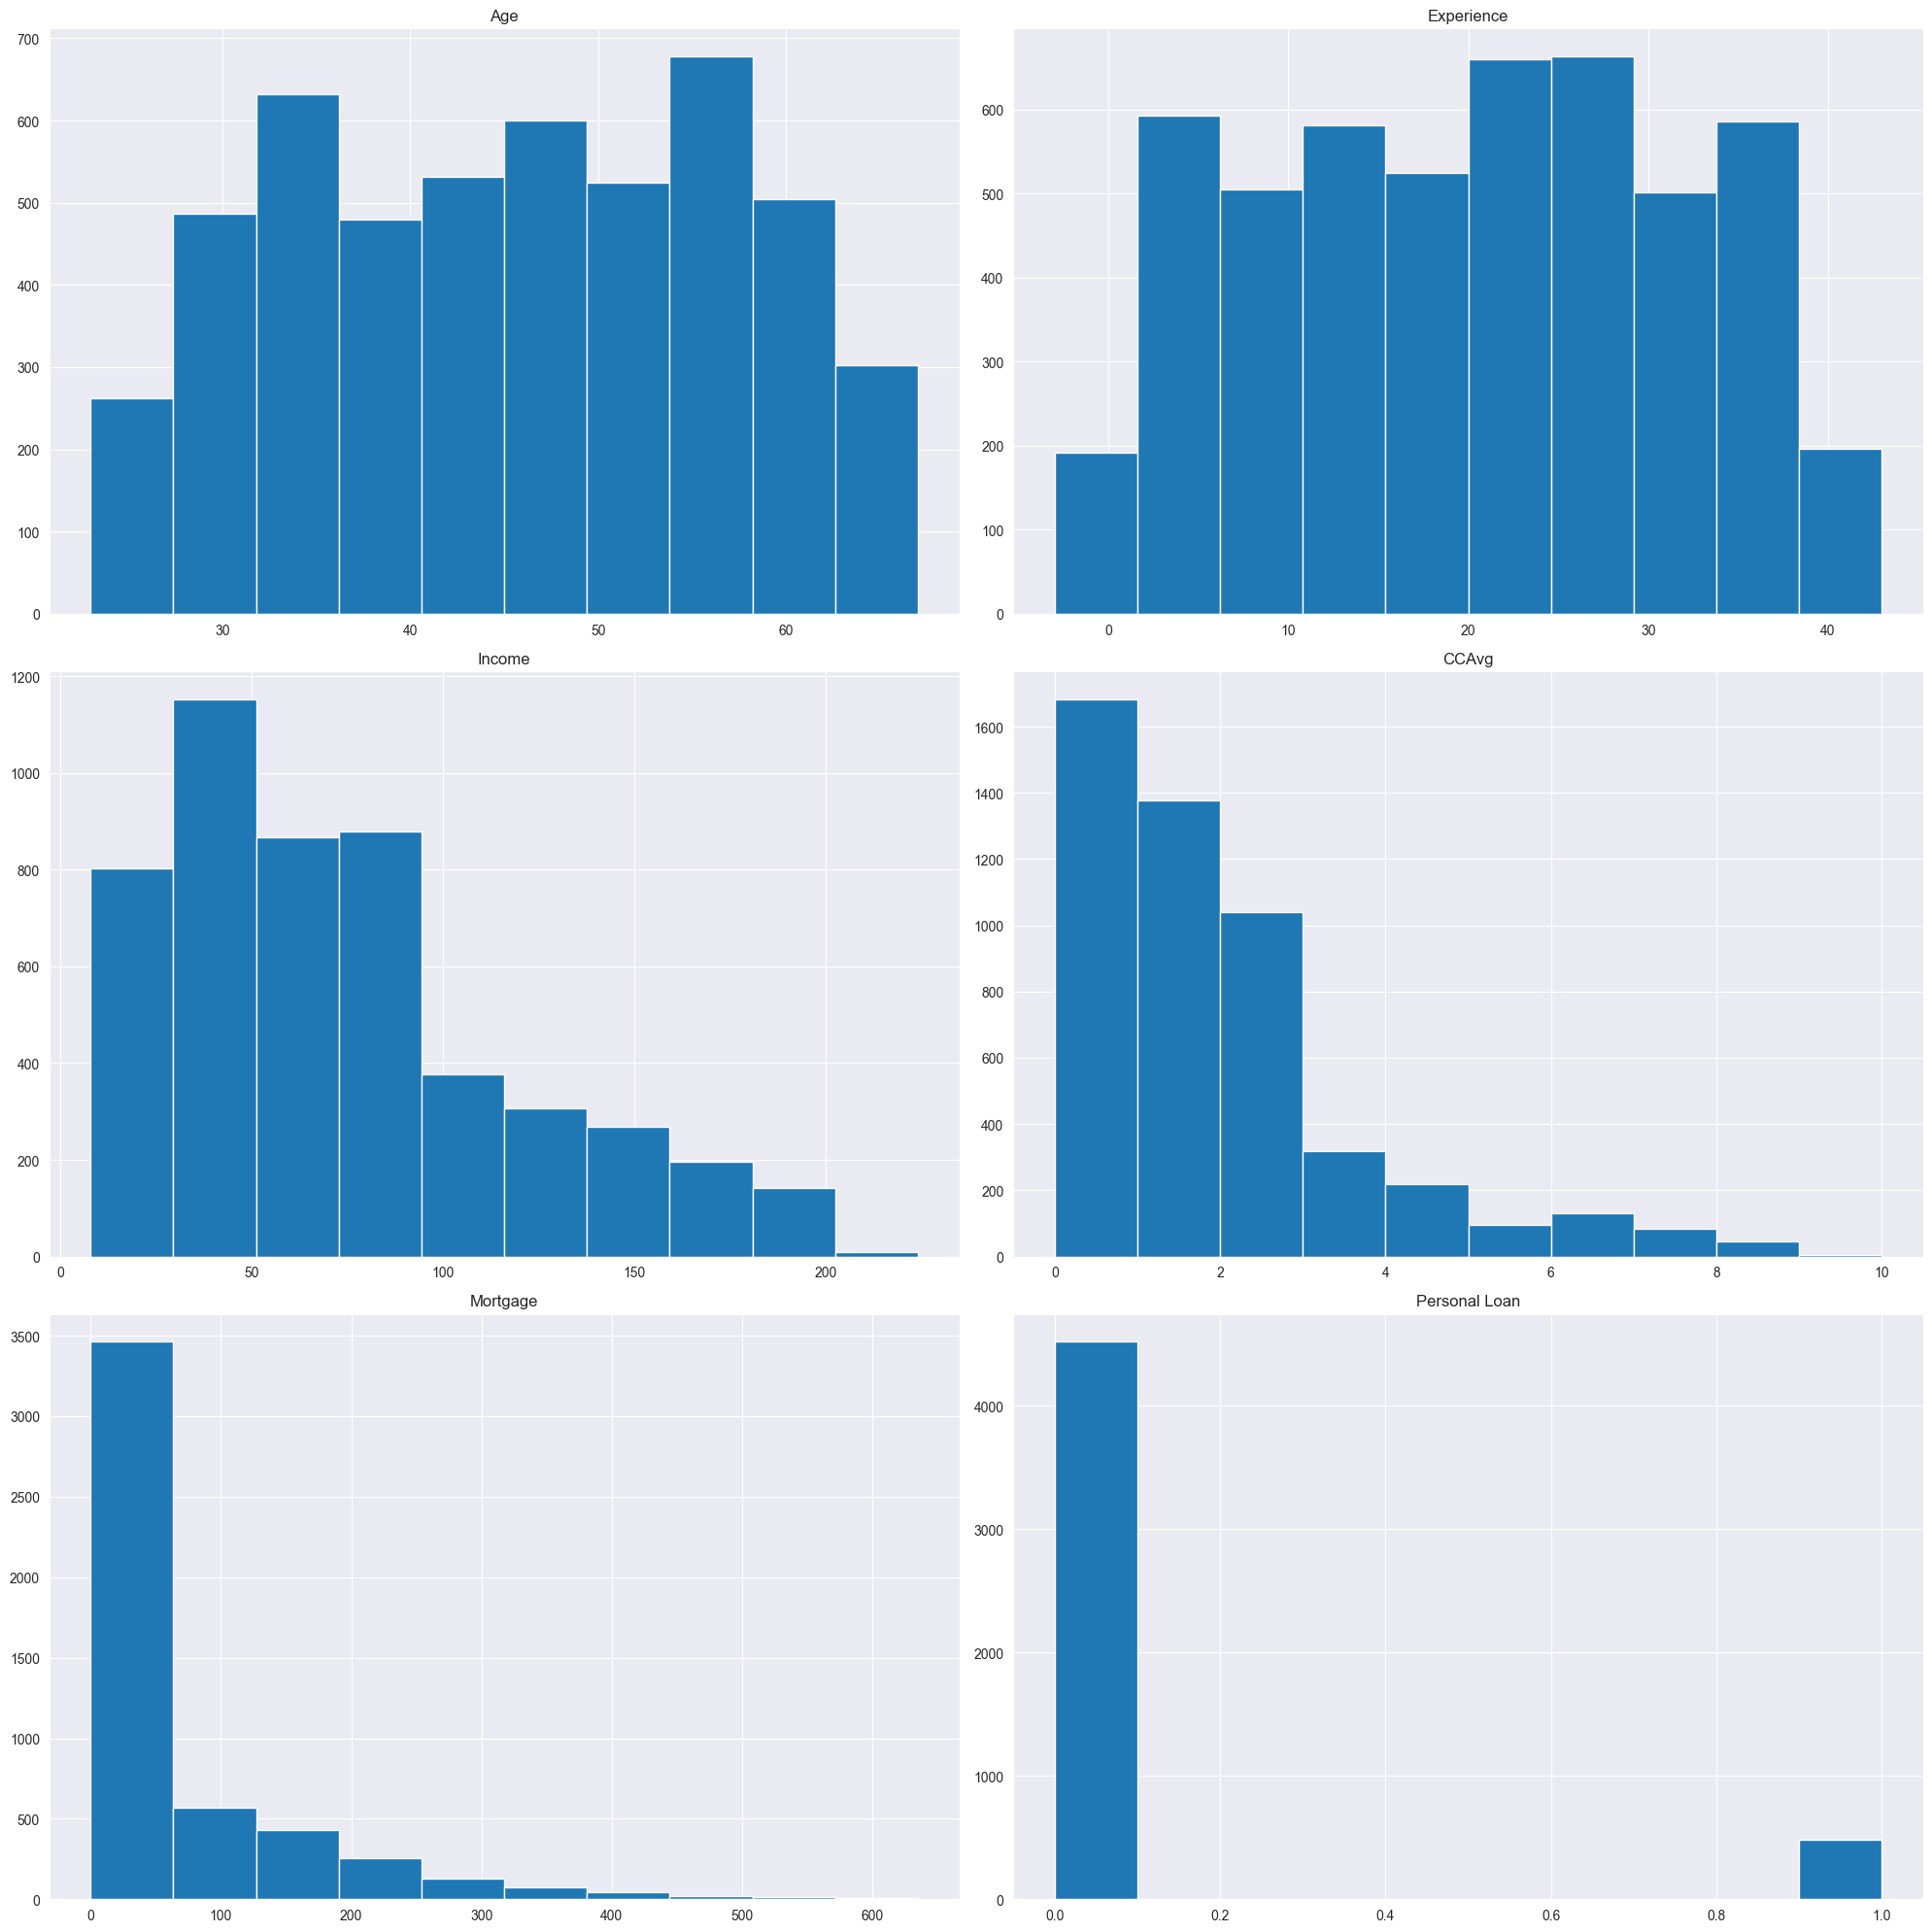

In [8]:
def print_histograms(data):
    """This function print the histogram distribution of the numeric variables in the dataset"""
    dataset.hist(figsize=(20, 20))
    plt.tight_layout()
    
    
print_histograms(dataset) 

In [9]:
def compute_correlations_matrix(data):
    
    # Compute the correlation matrix
    correlation_matrix = data.corr()
    
    return correlation_matrix
data_correl = compute_correlations_matrix(dataset)
data_correl

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan
Age,1.000000,0.994215,-0.055269,-0.052012,-0.012539,-0.007726
Experience,0.994215,1.000000,-0.046574,-0.050077,-0.010582,-0.007413
Income,-0.055269,-0.046574,1.000000,0.645984,0.206806,0.502462
CCAvg,-0.052012,-0.050077,0.645984,1.000000,0.109905,0.366889
Mortgage,-0.012539,-0.010582,0.206806,0.109905,1.000000,0.142095
Personal Loan,-0.007726,-0.007413,0.502462,0.366889,0.142095,1.000000


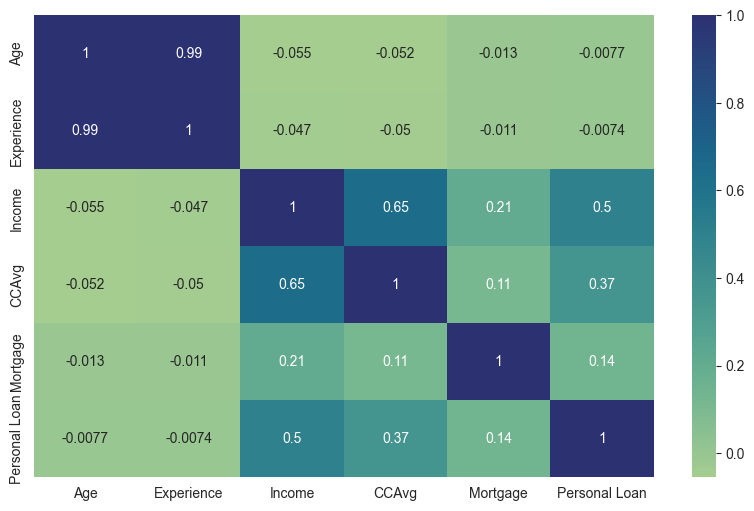

In [10]:
# plot a heat map to visualize the correlation matrix
plt.figure(figsize=(10,6))
sb.heatmap(data_correl, annot=True, cmap='crest' );

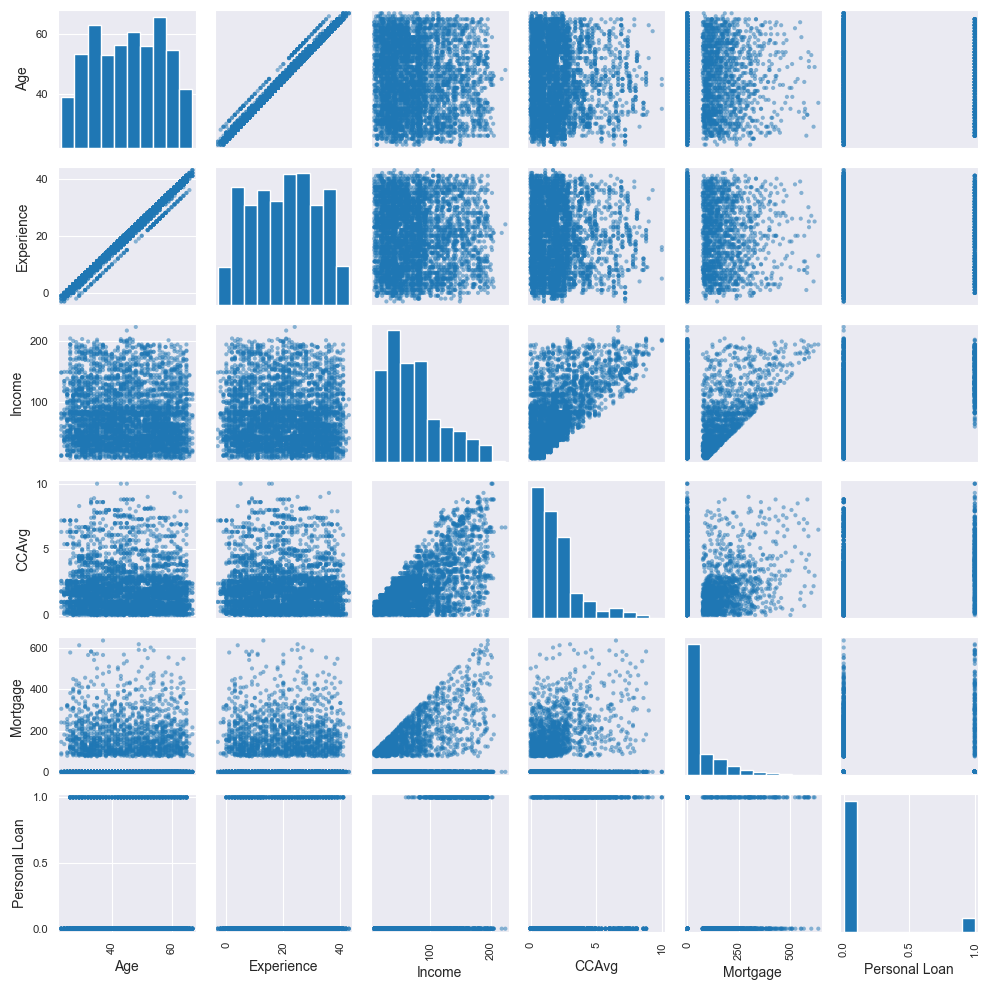

In [11]:
def print_scatter_matrix(data):
    """This function visualises the scatter matrix between the variables of the data set"""
    pd.plotting.scatter_matrix(data, figsize=(10, 10))
    plt.tight_layout()

print_scatter_matrix(dataset)

#### Personal Loan Class Distribution

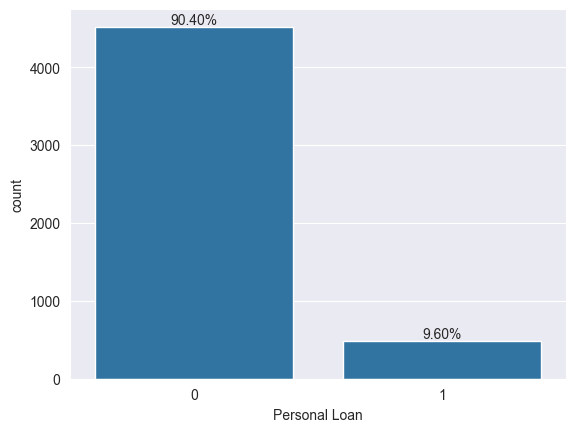

In [12]:
sb.countplot(data=dataset, x='Personal Loan')

# Get the count of each class
value_counts = dataset['Personal Loan'].value_counts()

# Calculate the percentage of each class
total = value_counts.sum()
percentages = [(count / total) * 100 for count in value_counts]

# Annotate the bars with the percentage values
for i, count in enumerate(value_counts):
    plt.text(i, count, f'{percentages[i]:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

## Distribution of Income, CCAvg, Age, Mortgage And Experience By Personal Loan

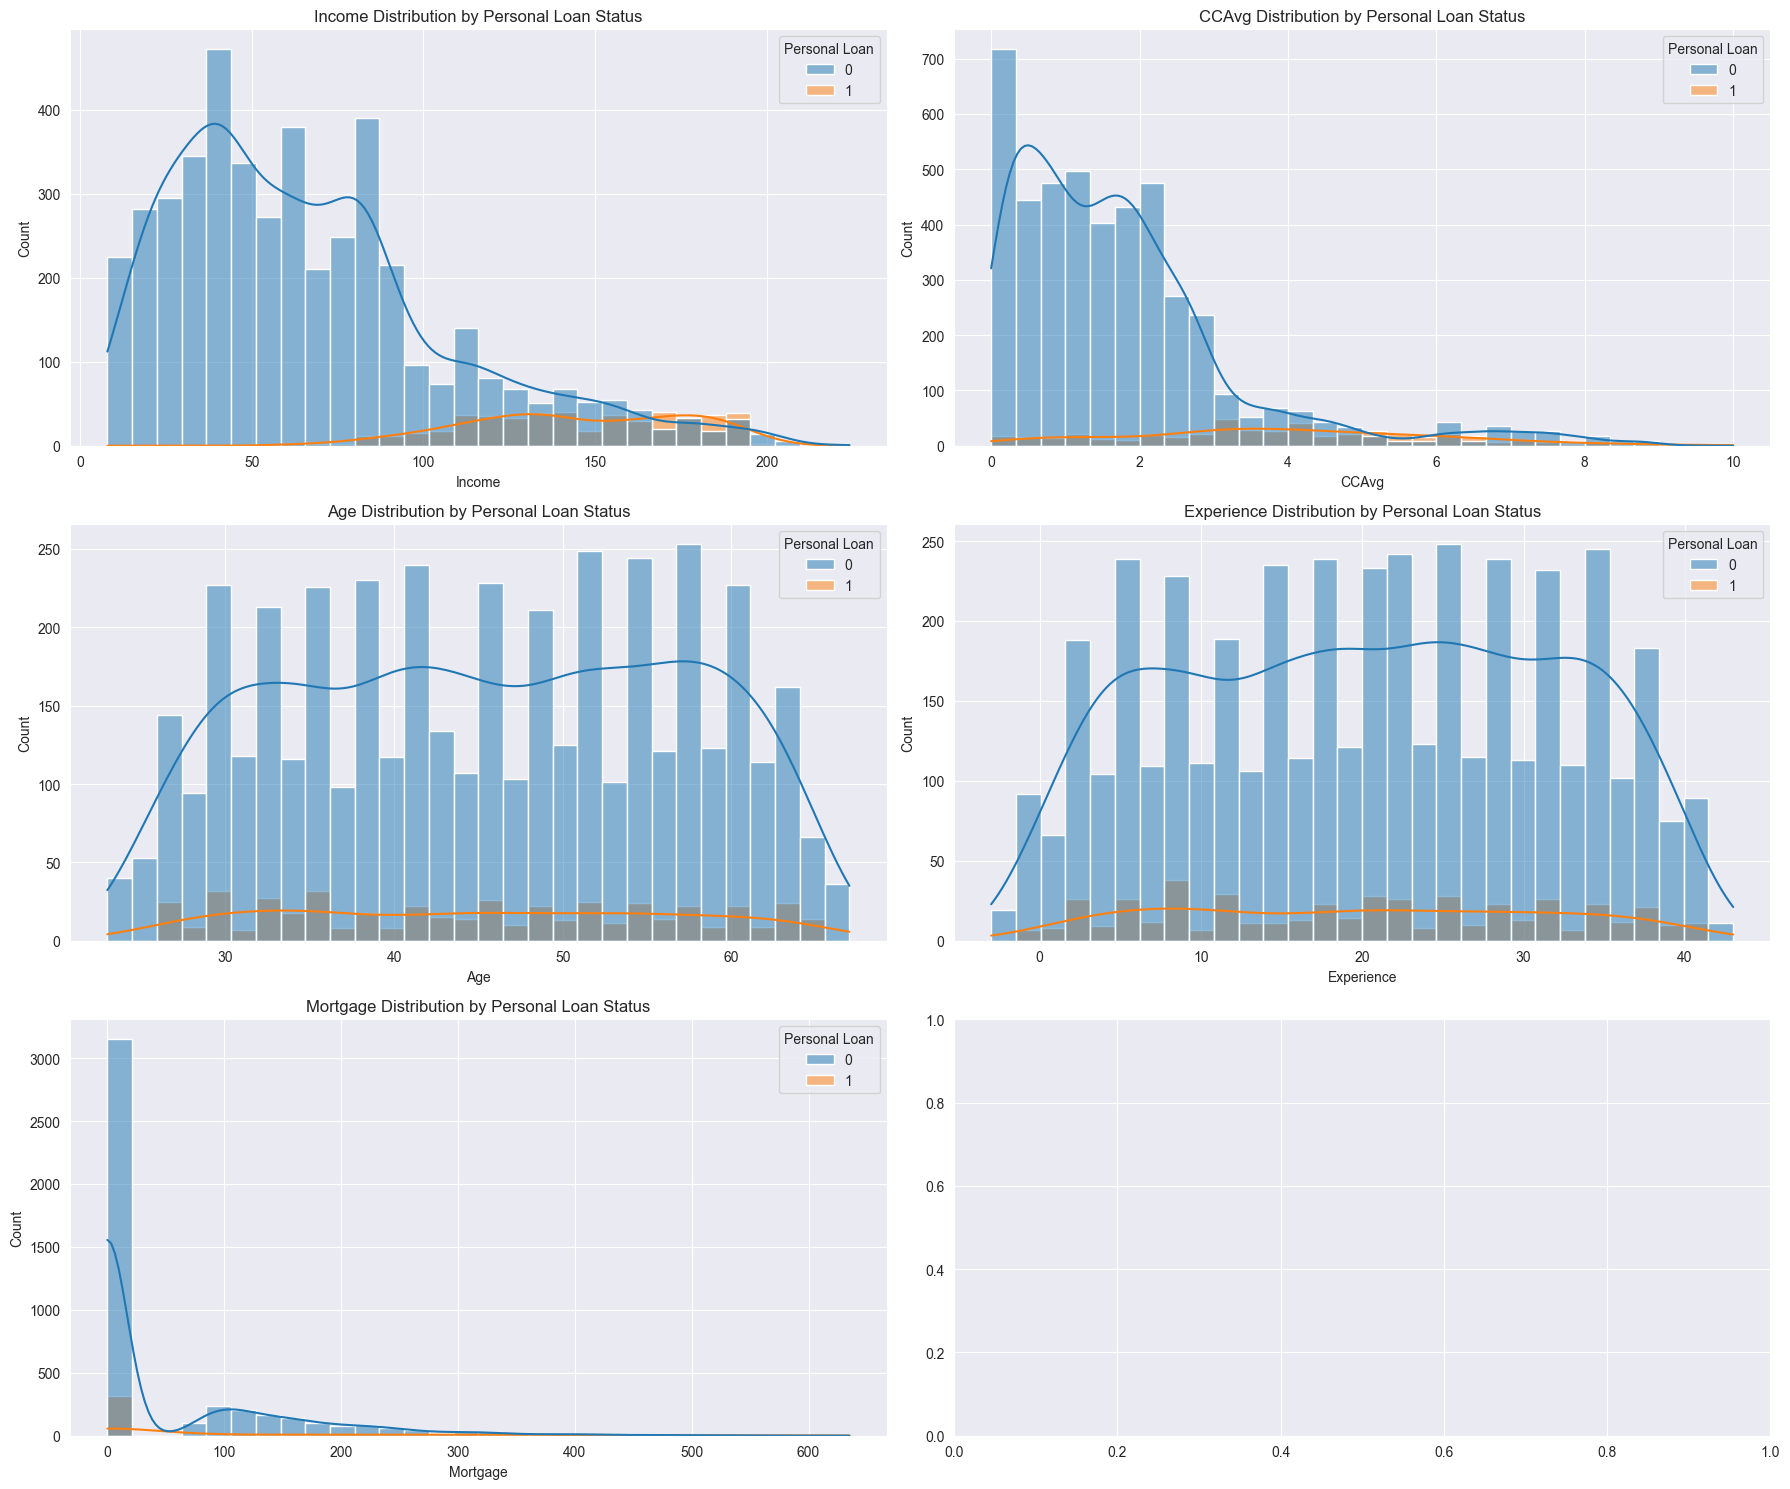

In [13]:
# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(18, 15))


# Visualize the distribution of "Income" by "Personal Loan" status
sb.histplot(data = dataset, x = 'Income', hue='Personal Loan', kde=True, bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Income Distribution by Personal Loan Status')

# Visualize the distribution of "CCAvg" by "Personal Loan" status
sb.histplot(data=dataset, x='CCAvg', hue='Personal Loan', kde=True, bins=30, ax=axes[0, 1])
axes[0, 1].set_title('CCAvg Distribution by Personal Loan Status')

# Visualize the distribution of "Age" by "Personal Loan" status
sb.histplot(data=dataset, x='Age', hue='Personal Loan', kde=True, bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution by Personal Loan Status')

# Visualize the distribution of "Experience" by "Personal Loan" status
sb.histplot(data=dataset, x='Experience', hue='Personal Loan', kde=True, bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Experience Distribution by Personal Loan Status')

# Visualize the distribution of "Mortgage" by "Personal Loan" status
sb.histplot(data=dataset, x='Mortgage', hue='Personal Loan', kde=True, bins=30, ax=axes[2, 0])
axes[2, 0].set_title('Mortgage Distribution by Personal Loan Status')

# Adjust the layout
plt.tight_layout()

# Display the subplots
plt.show()

The distribution plots above illustrate how certain numeric variables relate to personal loan acceptance. Notably, an increase in income is strongly associated with a higher likelihood of accepting a personal loan. Additionally, a rise in CCAvg (average credit card spending) and the number of family members shows a modest increase in personal loan acceptance. On the contrary, variables like age, experience, and mortgage do not exhibit significant changes in relation to loan acceptance.

### Check For Outliers

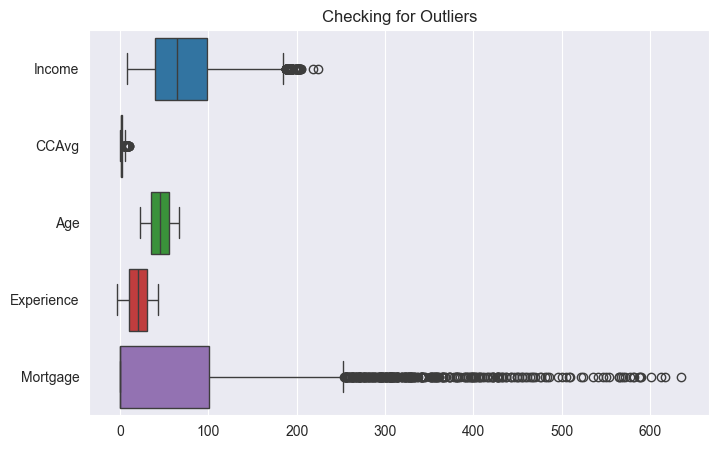

In [14]:
# Select the numeric features 
numeric_features = ['Income', 'CCAvg', 'Age', 'Experience', 'Mortgage']
plt.figure(figsize=(8, 5))
sb.boxplot(data=dataset[numeric_features], orient='h')  # Use numeric_cols without quotes
plt.title("Checking for Outliers")
plt.show()

### Distribution of Education, Securities Account, CD Account, Online, Credit Card By Personal Loan


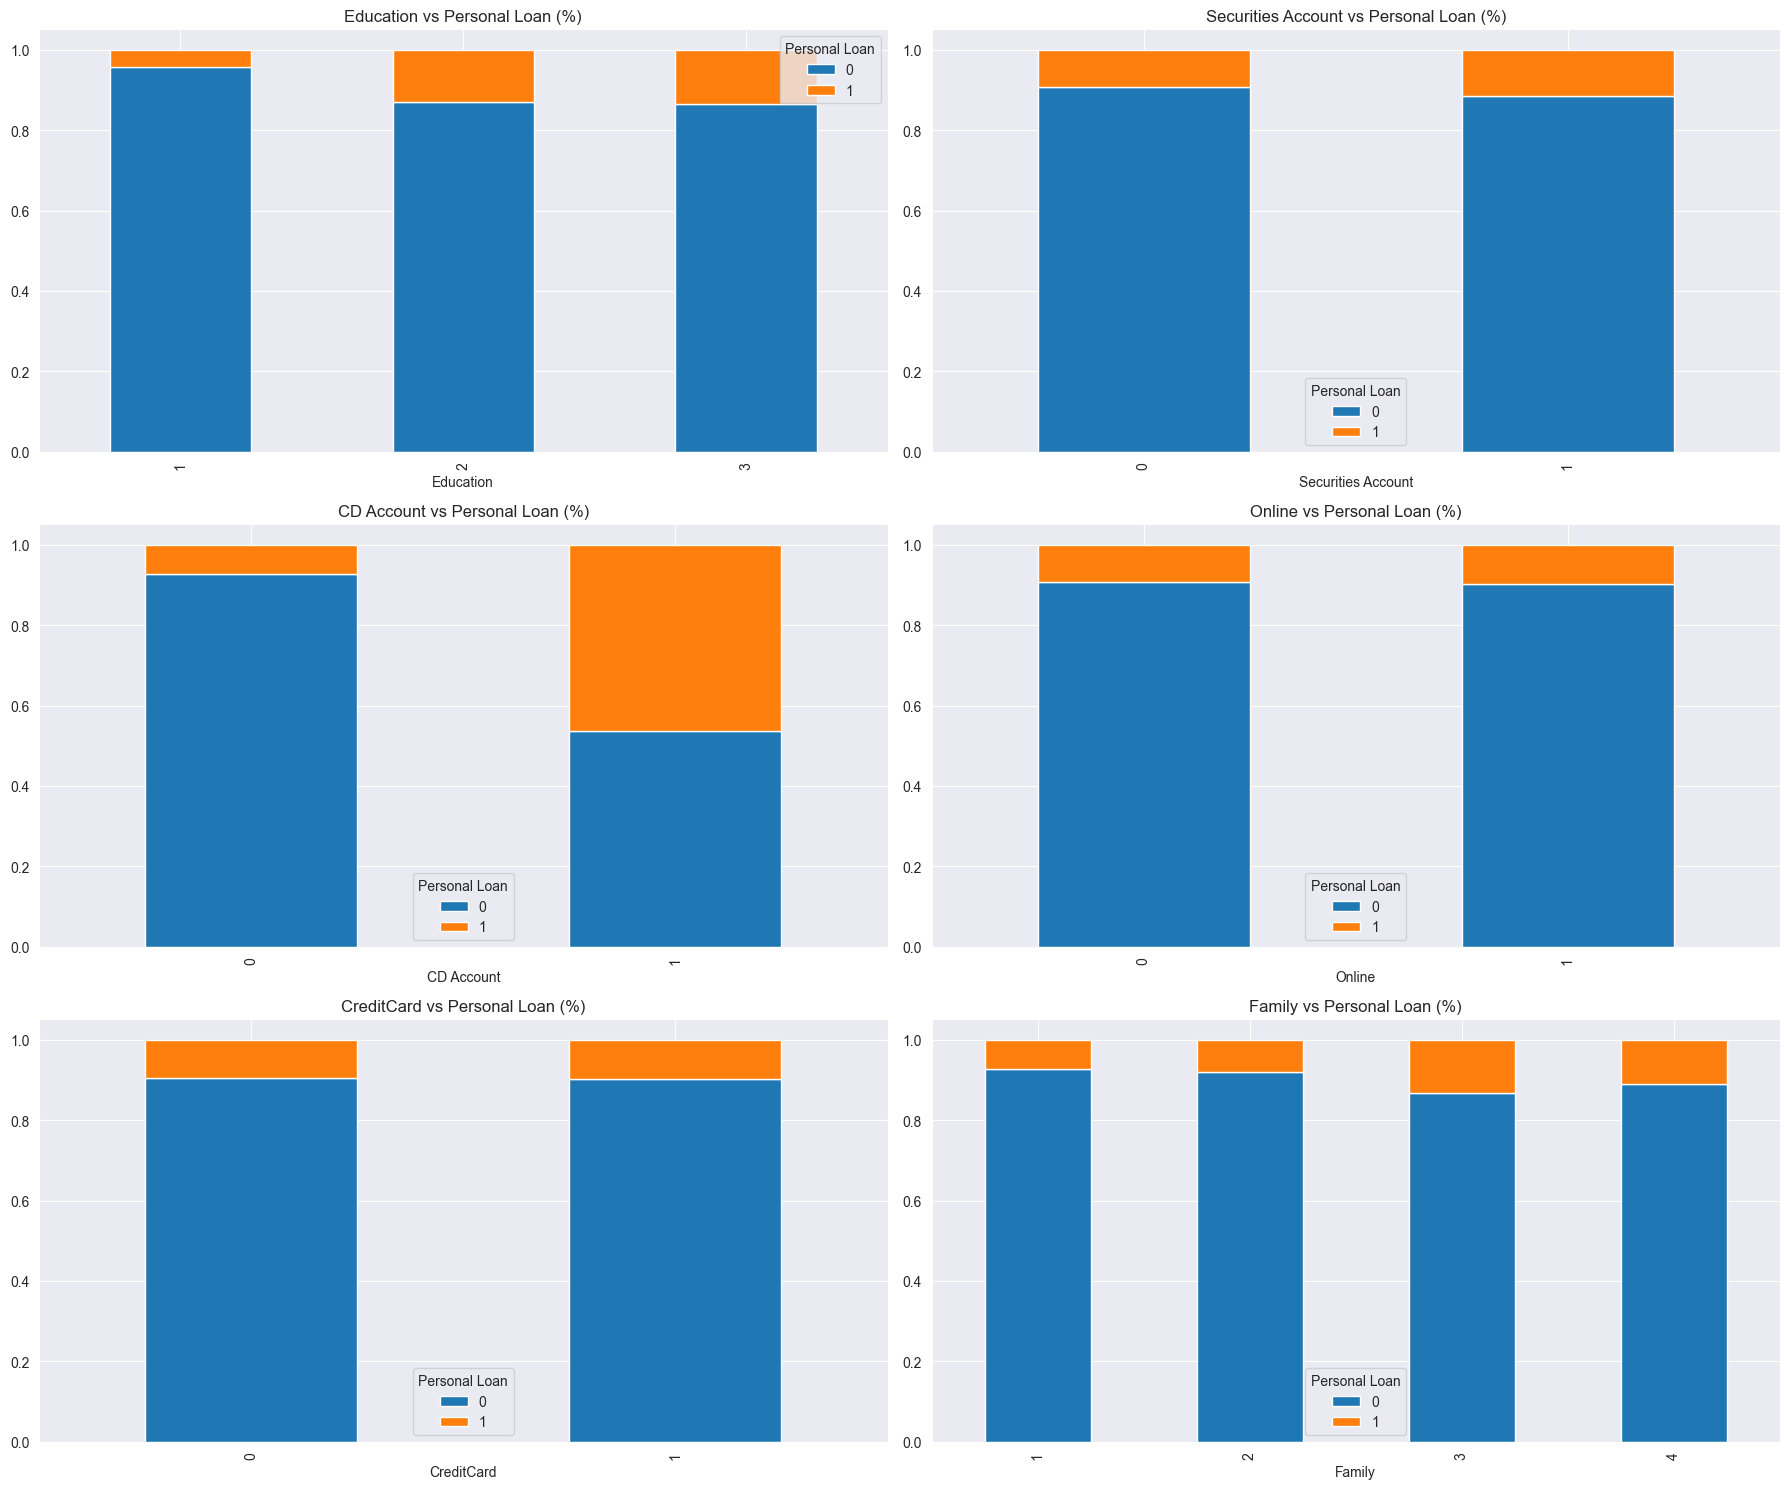

In [15]:
# Variables to visualize
variables = ['Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Family']

# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(18, 15))


# Iterate through variables and plot stacked bar charts
for i, variable in enumerate(variables):
    # Calculate the percentage of "Personal Loan" by category
    stacked_data = (dataset.groupby([variable, 'Personal Loan'])
                    .size()
                    .unstack()
                    .div(dataset.groupby(variable).size(), axis=0))
    
    # Plot the stacked bar chart
    stacked_data.plot(kind='bar', stacked=True, ax=axes[i//2, i%2])
    
    # Set the title for the current plot
    axes[i//2, i%2].set_title(f'{variable} vs Personal Loan (%)')

# Remove any extra subplots
for i in range(len(variables), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

# Adjust the layout
plt.tight_layout()
# Display the subplots
plt.show()


Based on the distributions presented above, it's evident that the likelihood of customers accepting a personal loan is influenced by their higher level of education and whether they have a CD Account, and also larger family. On the other hand, factors like credit card ownership, engagement in online transactions, and having a security account do not appear to significantly impact the acceptance of personal loans.

### Data Preprocessing

In [16]:
#scale the numeric features
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected features
scaled_features = scaler.fit_transform(dataset[numeric_features])

# replace original features with the scaled ones
dataset[numeric_features] = scaled_features

# View summary statistics of the dataset
print(dataset.describe())


                Age    Experience        Income         CCAvg      Mortgage  \
count  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03   
mean   2.478018e-17 -1.693312e-16  1.939449e-16 -2.078338e-17  2.810197e-16   
std    1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00   
min   -1.948906e+00 -2.014911e+00 -1.428969e+00 -1.108987e+00 -5.555239e-01   
25%   -9.019702e-01 -8.812043e-01 -7.554825e-01 -7.084116e-01 -5.555239e-01   
50%   -2.952359e-02 -9.121982e-03 -2.123482e-01 -2.506106e-01 -5.555239e-01   
75%    8.429230e-01  8.629604e-01  5.263146e-01  3.216407e-01  4.375576e-01   
max    1.889859e+00  1.996667e+00  3.263712e+00  4.613525e+00  5.688108e+00   

       Personal Loan  
count    5000.000000  
mean        0.096000  
std         0.294621  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  


In [17]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Family']

dataset_encoded = dataset.copy()
for col in categorical_cols:
    dataset_encoded[col] = LabelEncoder().fit_transform(dataset_encoded[col])

dataset_encoded.dtypes

Age                   float64
Experience            float64
Income                float64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage              float64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

upsampled_data dimension:
(9040, 12)

upsampled_data Personal Loan counts:
0    4520
1    4520
Name: Personal Loan, dtype: int64


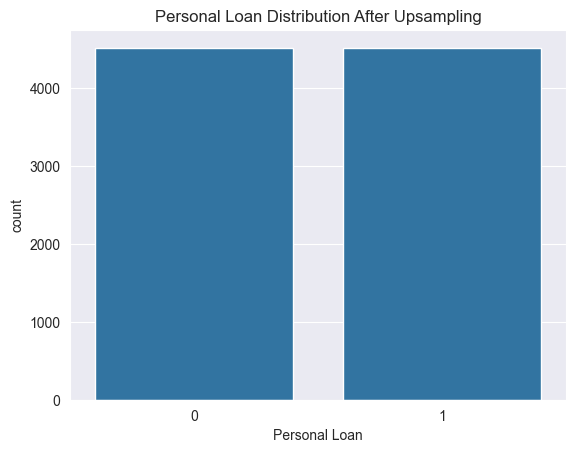

In [18]:
# Balance personal loan label by upsampling the inority 
from sklearn.utils import resample

# Create two different dataframes for the minority and majority class
df_minor = dataset[dataset['Personal Loan'] == 1]  
df_major = dataset[dataset['Personal Loan'] == 0]  

# Upsample minority class
df_minor_upsampled = resample(df_minor, 
                              replace=True,       # Sample with replacement
                              n_samples=len(df_major), 
                              random_state=0)

# Combine upsampled minority class with majority class
upsampled_data = pd.concat([df_major, df_minor_upsampled])

print("upsampled_data dimension:")
print(upsampled_data.shape)
print()

print('upsampled_data Personal Loan counts:')  
print(upsampled_data['Personal Loan'].value_counts())

# Plot class distribution
sb.countplot(x='Personal Loan', data=upsampled_data)
plt.title('Personal Loan Distribution After Upsampling')
plt.show()

#### split the data into train and test set

In [19]:
X = upsampled_data.drop(['Personal Loan'], axis = 1)
y = upsampled_data["Personal Loan"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Predictive Modelling

#### Initialising the ML classifiers

In [20]:
#initiating the logistic regression
log_reg = LogisticRegression()

#initiating the naive bayes model
naive_bayes = GaussianNB()

#initiating the KNN model
knn = KNeighborsClassifier(n_neighbors = 15)

#initializing the the RandomForest model
random = RandomForestClassifier(n_estimators = 50, oob_score = True,n_jobs=-1, random_state = 101, max_features = None, min_samples_leaf = 30)

#initializing the Support Vector Machine
SVM = SVC(kernel = "linear",C = 0.025, random_state = 101)

#initializing the Decision Tree
dtree = DecisionTreeClassifier(max_depth = 10, random_state = 101, max_features = None, min_samples_leaf = 15)

#### . Predicting and evaluating the Model performance

In [21]:
clf = {
'Logistic Regression': log_reg,
'Naive Bayes': naive_bayes,
'KNN': knn,
'Random Forests': random,
'Support Vector Machine': SVM,
'Decision Trees': dtree
}

evaluations = []

for classifier_name, classifier in clf.items():
    evals = {}
    
    # model training and  predictions
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    
    # model evaluation
    evals['Accuracy'] = accuracy_score(y_test, y_pred)
    evals['Precision'] = precision_score(y_test, y_pred, pos_label=1)
    evals['Recall'] = recall_score(y_test, y_pred, pos_label=1)
    evals['F1'] = f1_score(y_test, y_pred, pos_label=1)
    evaluations.append(evals)

metrics = pd.DataFrame(evaluations, index=['Logistic Regression', 'Naive Bayes', 'KNN', 'Random Forests', 'Support Vector Machine', 'Decision Trees'])
metrics

,Accuracy,Precision,Recall,F1
Logistic Regression,0.897677,0.895857,0.896861,0.896359
Naive Bayes,0.806969,0.844106,0.746637,0.792385
KNN,0.945796,0.923241,0.970852,0.946448
Random Forests,0.977876,0.960043,0.996637,0.977998
Support Vector Machine,0.893805,0.884615,0.902466,0.893452
Decision Trees,0.974558,0.970000,0.978700,0.974330


#### The ROC Curve and Confusion Matrix  Of The ML Classifiers

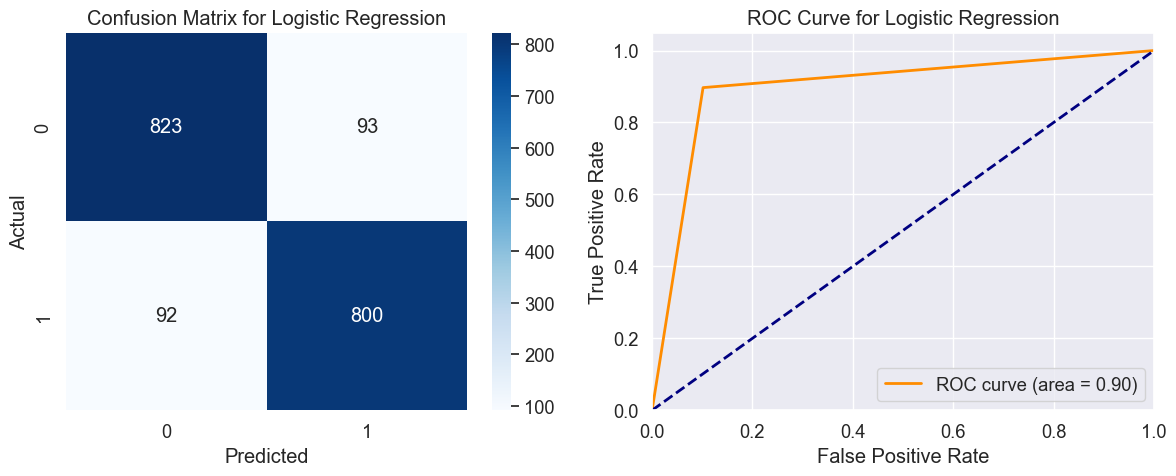

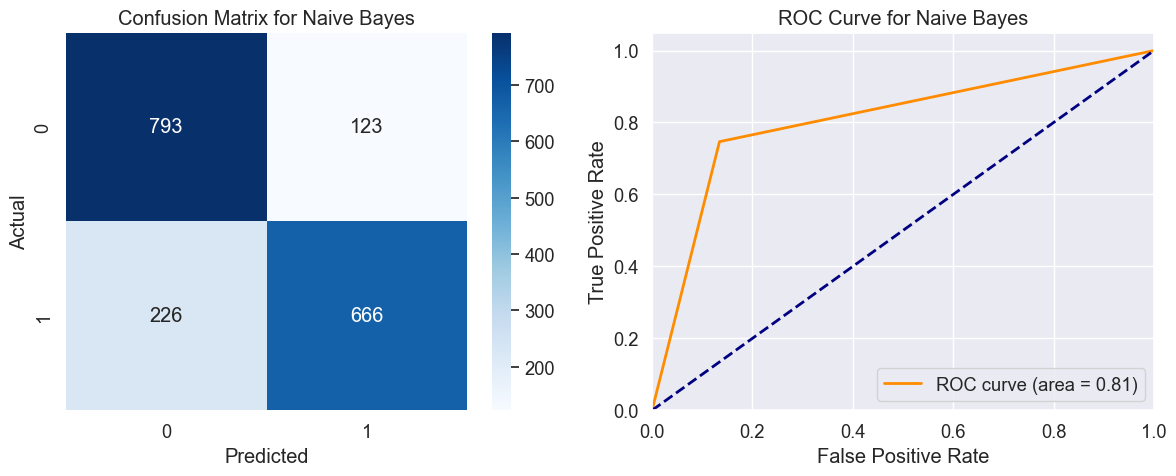

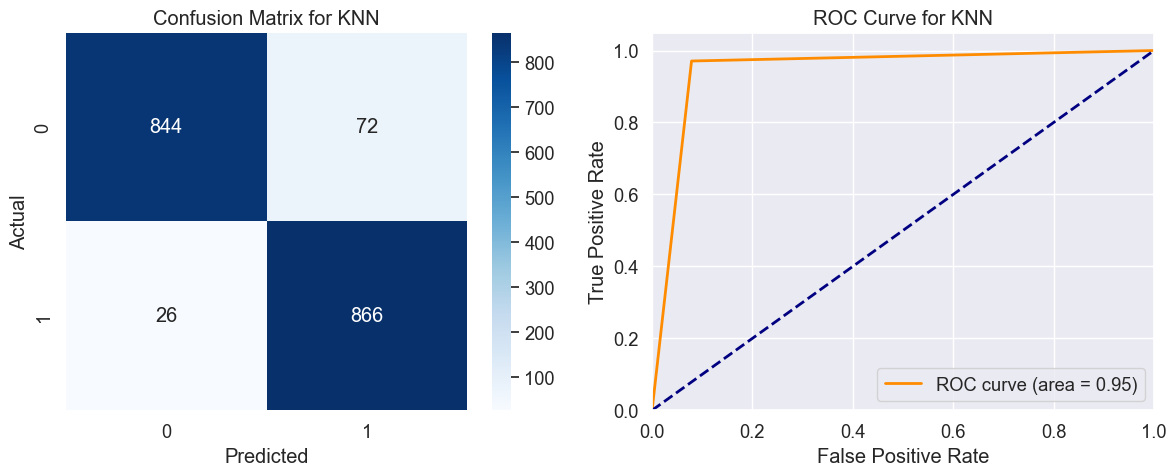

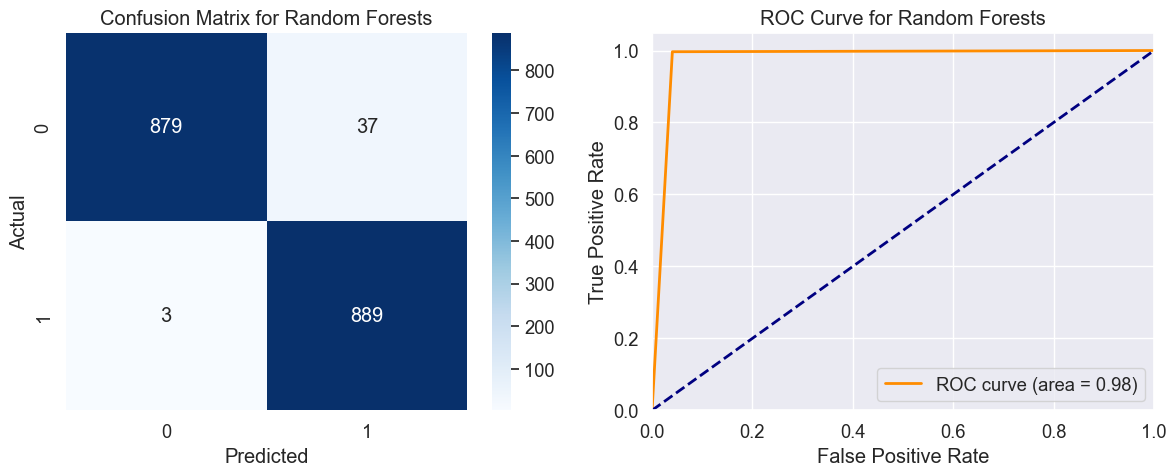

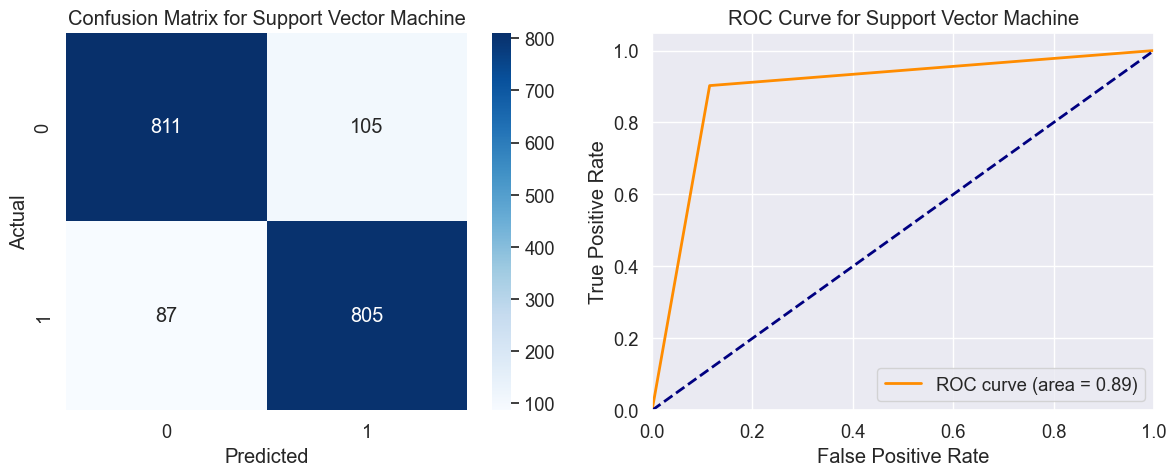

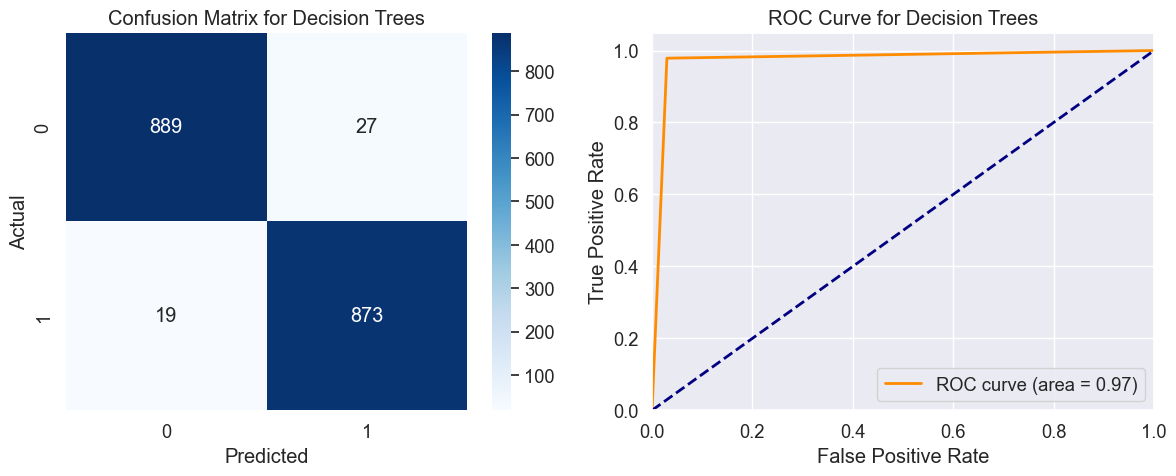

In [22]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

for classifier_name, classifier in clf.items():
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    
    sb.set(font_scale=1.2)
    # Confusion Matrix
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    cm = confusion_matrix(y_test, y_pred)
    sb.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    #ROC Curve
    plt.subplot(1, 2, 2)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {classifier_name}')
    plt.legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()

#### Evaluation Scores Summary

The presented dataframe, confusion matrix, and ROC curve above provides an overview of the performance metrics for the various machine learning classifiers employed in predicting personal loan acceptance. Notably, both the Decision Tree and Random Forests emerge as the top-performing algorithms due to their superior scores across all evaluation metrics, KNN also did performed well accross all metrics. 

There is no significant difference between the Random Forest and Decision Tree across all evaluation metrics. However, the Decision Tree classifier showed a 0.1 increase in precision score, while the Random Forest had an approximately 0.2 higher recall score.

#### The ROC Curve and Confusion Matrix For The Random Forest And Decision Tree Algorithm

Based on the information provided by the ROC Curve and Confusion Matrix, it is evident that the Random Forest and decision tree model are most suitable choice for the task of prediction. The ROC Curve and the Area Under the Curve (AUC) are valuable metrics for evaluating the overall performance of a binary classification model, with AUC values ranging from 0 to 1. The closer the AUC is to 1, the better the model's performance. In this context, both the Random Forest and Decision Tree models both achieved an AUC of 0.98 and 0.97 respectively, indicating strong predictive performance of the models.

Moreover, when analyzing the confusion matrix, both models correctly identified higher True Positives, and True Negatives, and lower false positive and false negative errors compared to other models.This observation underscores both models strength in effectively identifying positive cases and minimizing both false positive and false negative errors.

In summary, while both models are strong, the Random Forest's slightly higher precision, F1 score and AUC makes it a preferred choice for accurately identifying positive cases with fewer errors making it most suitable choice for prediction. However, potential risks include model complexity and deployment challenges. It's crucial to assess the business impact of false positives and false negatives and monitor the model's performance over time.

### Faeture Importance Analysis

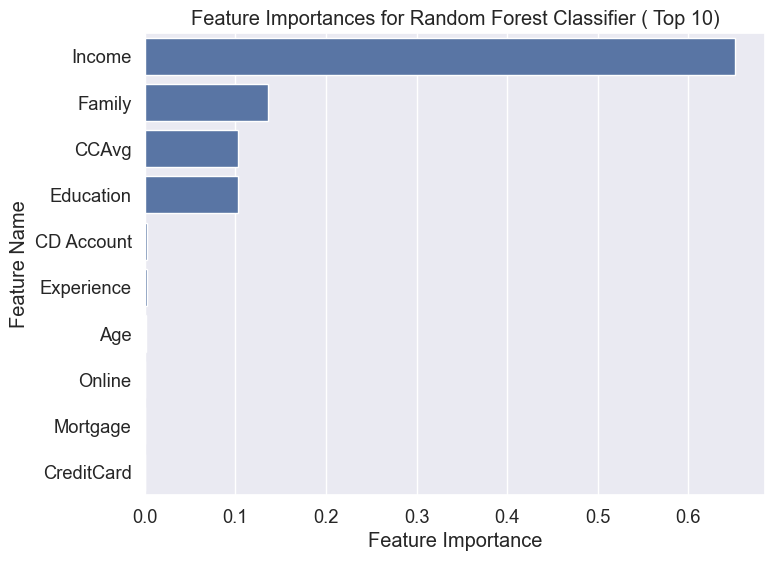

In [23]:
# Random Forest feature selecton
rf_model = clf['Random Forests']

# Get feature importances from the model
importances = rf_model.feature_importances_

# Get the names of the features (assuming X_train is your feature data)
feature_names = X_train.columns

# Create a DataFrame to store feature names and their importances
imp_df = pd.DataFrame({'Feature Name': feature_names, 'Importance': importances})

# Sort the DataFrame by feature importance in descending order
imp_df = imp_df.sort_values(by='Importance', ascending=False).head(10)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(8, 6))
sb.barplot(data = imp_df, y ='Feature Name', x = 'Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importances for Random Forest Classifier ( Top 10)')
plt.show()


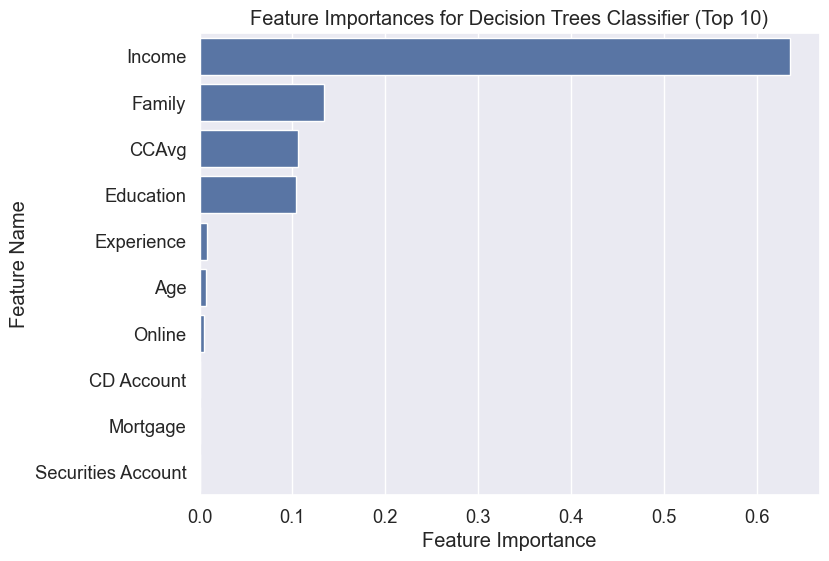

In [24]:
# decision Tree feature selection
dt_model = clf['Decision Trees']

# Get feature importances from the model
importances = dt_model.feature_importances_

# Get the names of the features (assuming X_train is your feature data)
feature_names = X_train.columns

# Create a DataFrame to store feature names and their importances
imp_df = pd.DataFrame({'Feature Name': feature_names, 'Importance': importances})

# Sort the DataFrame by feature importance in descending order
imp_df = imp_df.sort_values(by='Importance', ascending=False).head(10)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(8, 6))
sb.barplot(data = imp_df, y ='Feature Name', x = 'Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importances for Decision Trees Classifier (Top 10)')
plt.show()


#### Feature Analysis Observations

The Random Forest and Decision Tree models identify income, education, average credit card spending (CCAvg), family size,
and CD account ownership as key predictors for personal loan acceptance. These insights suggest that individuals with higher
income, education, credit card spending, larger families, and having a CD accounts are more likely to accept personal loans. 
Understanding these features can inform targeted business strategies and help the marketing team to make informed decision and also  risk assessments in the context of personal loan offerings in the bank.

#### Save the Decision Tree and Random Forest Models for deployment

In [25]:
from joblib import dump

# Save Random Forest model to a file
dump(rf_model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [26]:
#Save Decision Tree model to a file
dump(dt_model, 'Decision Trees_model.joblib')

['Decision Trees_model.joblib']